In [1]:
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.01*t_u   #originally 0.1 but this was to high

In [3]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [5]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)      

In [6]:
epoch_store =[]
loss_store = []

In [7]:
def training_loop(n_epochs, params, t_u, t_c, optimizer, epoch_store, loss_store):
    for epoch in range(1, n_epochs +1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            epoch_store.append(epoch)
            loss_store.append(float(loss))
    
    return params, epoch_store, loss_store

In [8]:
#t_p = model(t_u, *params)
#loss = loss_fn(t_p, t_c)
#loss.backward()
#optimizer.step()
#params

In [9]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c,
    epoch_store = epoch_store,
    loss_store = loss_store)

Epoch 500, Loss 57.949387
Epoch 1000, Loss 40.551369
Epoch 1500, Loss 33.974377
Epoch 2000, Loss 27.274971
Epoch 2500, Loss 20.752821
Epoch 3000, Loss 14.940603
Epoch 3500, Loss 10.199283
Epoch 4000, Loss 6.687762
Epoch 4500, Loss 4.367294
Epoch 5000, Loss 3.038020


(tensor([19.8351, 27.2414, -7.6692], requires_grad=True),
 [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
 [57.94938659667969,
  40.551368713378906,
  33.9743766784668,
  27.27497100830078,
  20.75282096862793,
  14.940603256225586,
  10.1992826461792,
  6.687762260437012,
  4.3672943115234375,
  3.038020133972168])

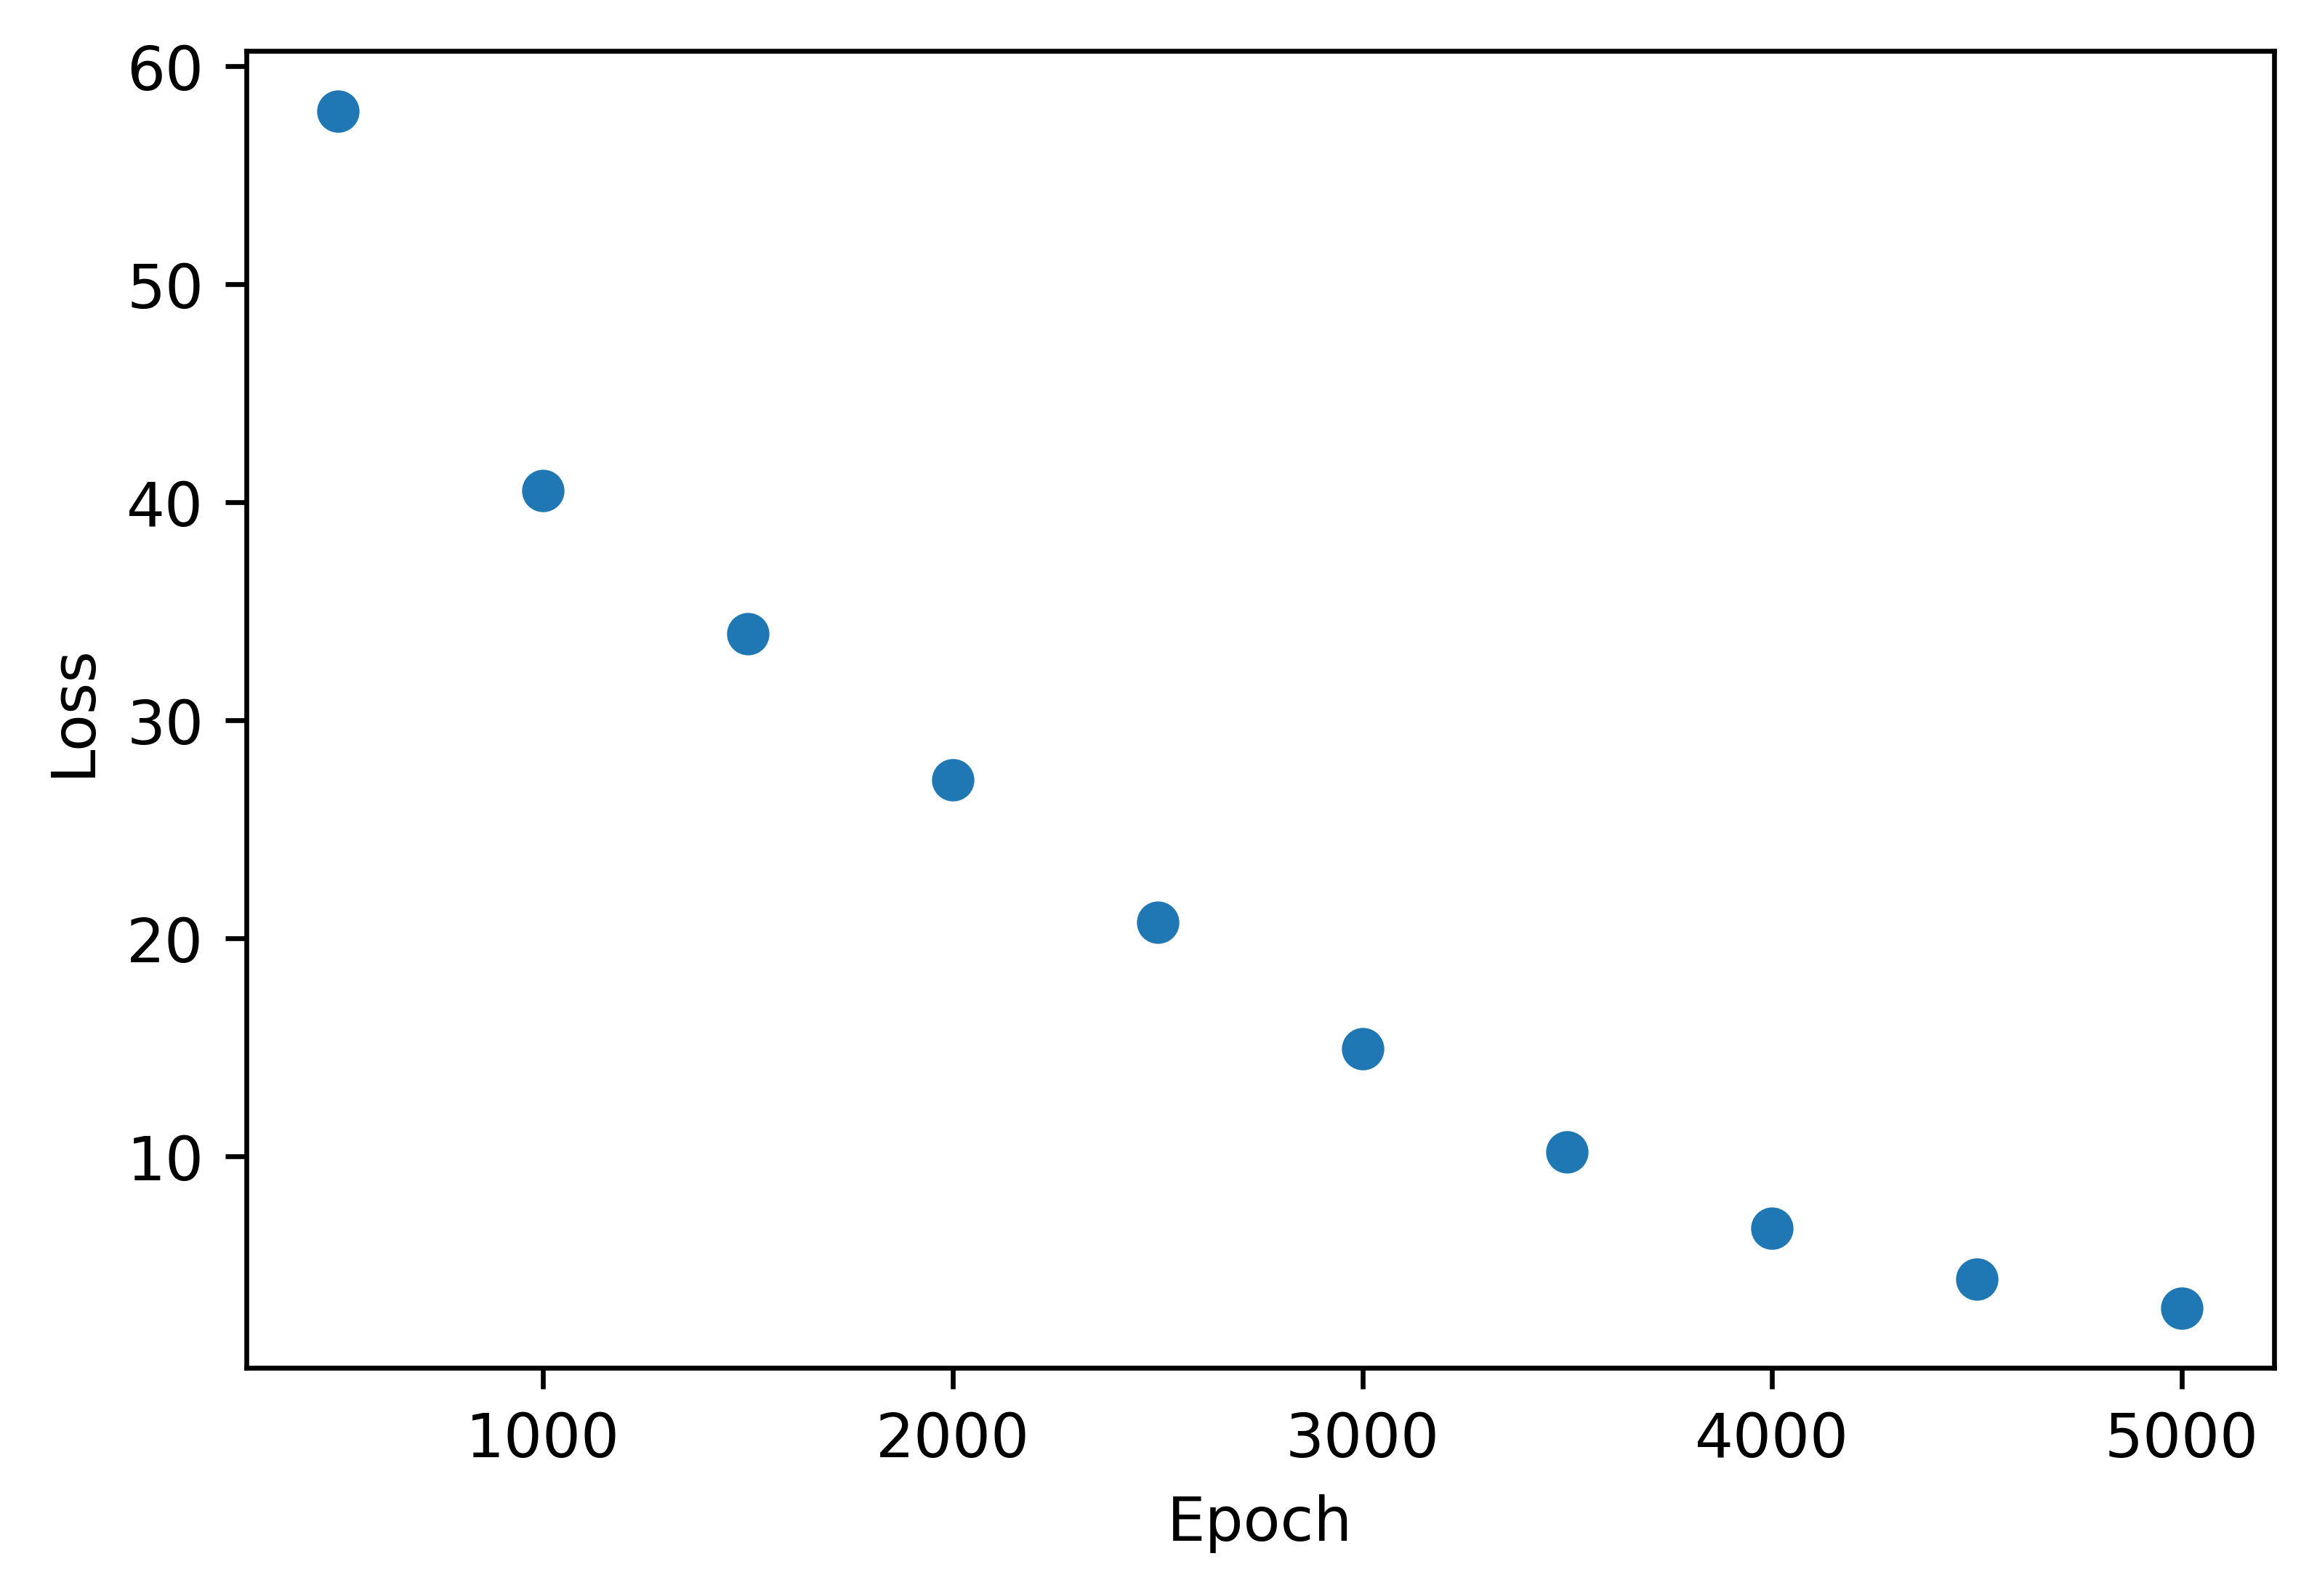

In [10]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epoch_store, loss_store, 'o')
